# Comparison: May 22, 2023 to May 21, 2023 Run:201905

In [1]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr

from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

%matplotlib inline

In [2]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
tmask = mesh['tmask']
deptht = mesh['gdept_1d'][0]

In [76]:
befyear = '20may23'
oldyear = '21may23'
newyear = '22may23'
bdmy = '20230520'
odmy = '20230521'
dmy = '20230522'
time = 23
imin, imax = 385, 470

In [106]:
def cross_plot(tracer, vmax, vmin, dv, cmap, file):
    fig, axs = plt.subplots(2, 3, figsize=(15, 8))
    do = xr.open_dataset(
            f'/results2/SalishSea/nowcast-green.201905/{befyear}/SalishSea_1h_{bdmy}_{bdmy}_{file}_T.nc')
    bmean_field = np.ma.array(do[tracer][time, :, imin:imax, 2], mask=1-tmask[0, :, imin:imax, 2])
    now_plot(bmean_field, tracer, vmin, vmax, axs[0, 0], '20may23', cmap)
    dm = xr.open_dataset(
            f'/results2/SalishSea/nowcast-green.201905/{oldyear}/SalishSea_1h_{odmy}_{odmy}_{file}_T.nc')
    mmean_field = np.ma.array(dm[tracer][time, :, imin:imax, 2], mask=1-tmask[0, :, imin:imax, 2])
    now_plot(mmean_field, tracer, vmin, vmax, axs[0, 1], '21may23', cmap)
    now_plot(mmean_field, tracer, vmin, vmax, axs[1, 0], '21may23', cmap)
    now_plot(mmean_field-bmean_field, tracer, -dv, dv, axs[0, 2], 'diffy', cm.balance)
    ds = xr.open_dataset(
            f'/results2/SalishSea/nowcast-green.201905/{newyear}/SalishSea_1h_{dmy}_{dmy}_{file}_T.nc')
    smean_field = np.ma.array(ds[tracer][time, :, imin:imax, 2], mask=1-tmask[0, :, imin:imax, 2])
    now_plot(smean_field, tracer, vmin, vmax, axs[1, 1], '22may23', cmap)
    now_plot(smean_field-mmean_field, tracer, -dv, dv, axs[1, 2], 'diffy', cm.balance)

def now_plot(mean_field, tracer, vmin, vmax, ax, oldyear, cmap):
    colours = ax.pcolormesh(np.arange(imin, imax), deptht, mean_field, cmap=cmap, vmax=vmax, vmin=vmin, shading='auto')
    ax.set_title(oldyear)
    ax.set_ylim(0, 300)
    ax.invert_yaxis()
    fig.colorbar(colours, ax=ax)

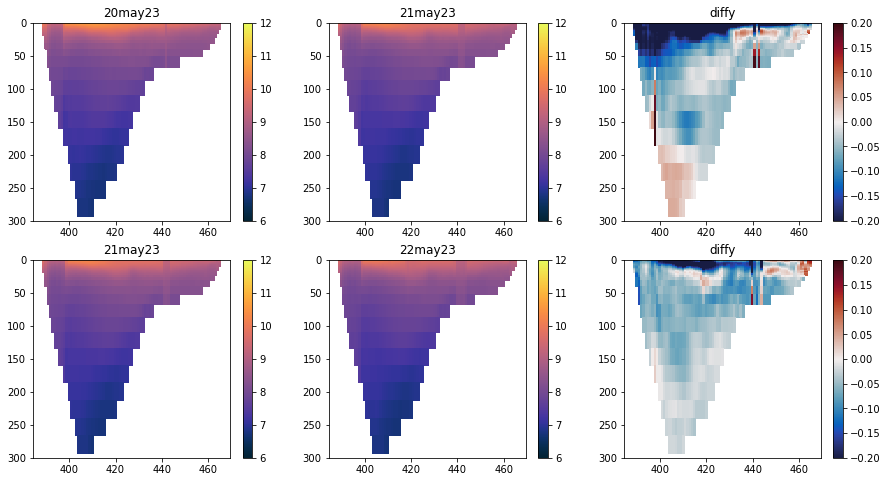

In [141]:
cross_plot('votemper', vmax=12, vmin=6, dv=0.2, cmap=cm.thermal, file='grid')

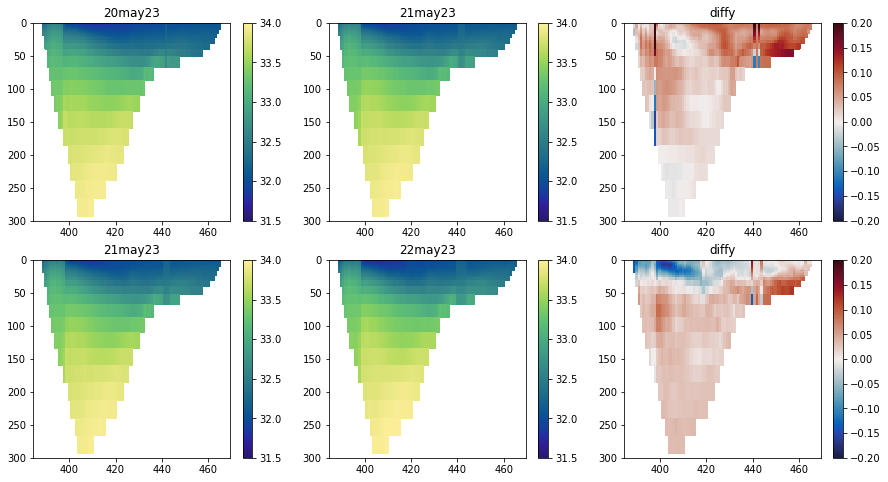

In [140]:
cross_plot('vosaline', vmax=34, vmin=31.5, dv=0.2, cmap=cm.haline, file='grid')

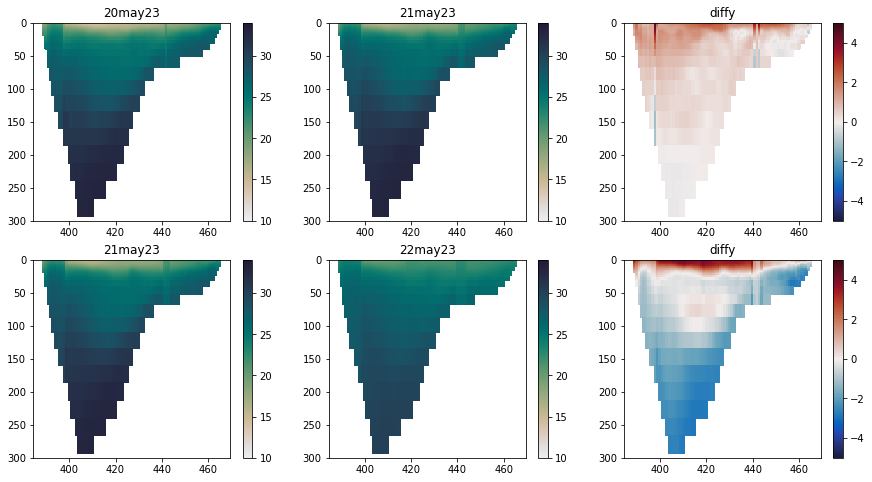

In [109]:
cross_plot('nitrate', vmax=34, vmin=10, dv=5, cmap=cm.rain, file='ptrc')

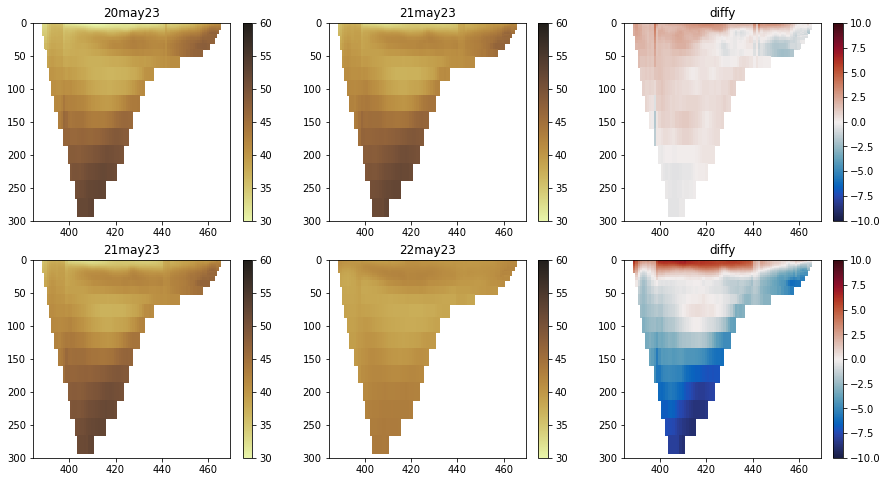

In [110]:
cross_plot('silicon', vmax=60, vmin=30, dv=10, cmap=cm.turbid, file='ptrc')

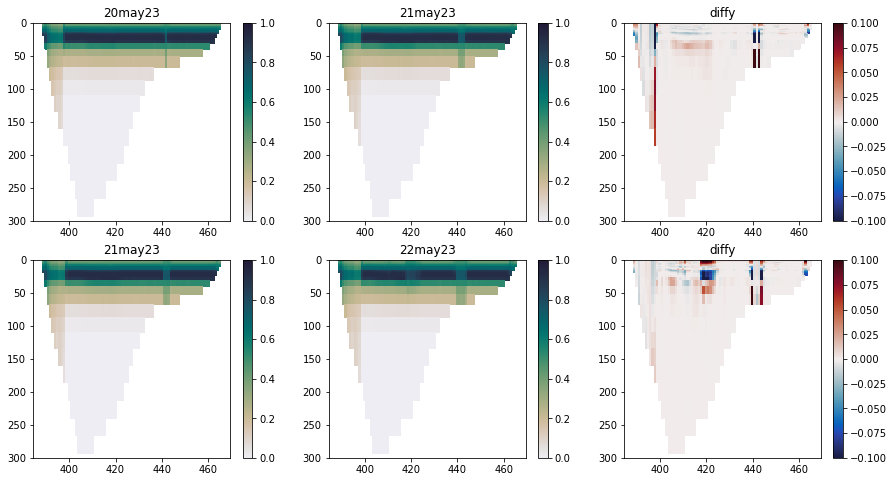

In [114]:
cross_plot('ammonium', vmax=1, vmin=0, dv=0.1, cmap=cm.rain, file='ptrc')

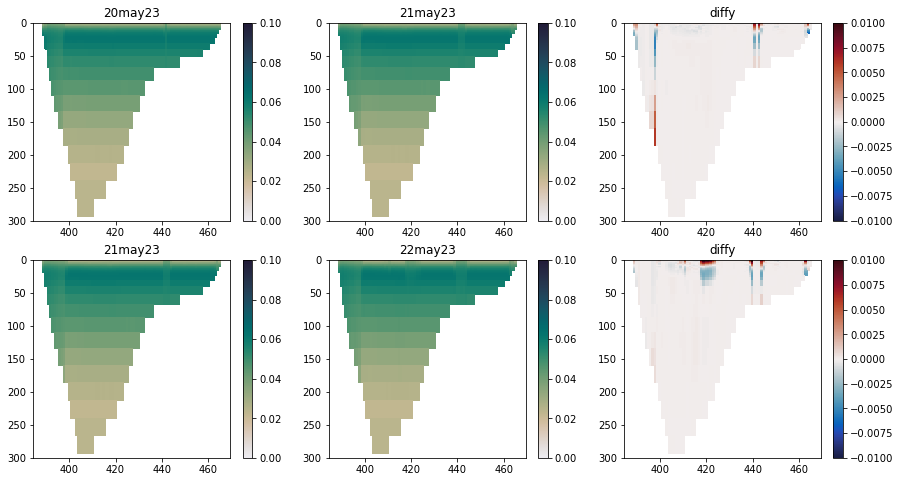

In [118]:
cross_plot('particulate_organic_nitrogen', vmax=0.1, vmin=0, dv=0.01, cmap=cm.rain, file='ptrc')

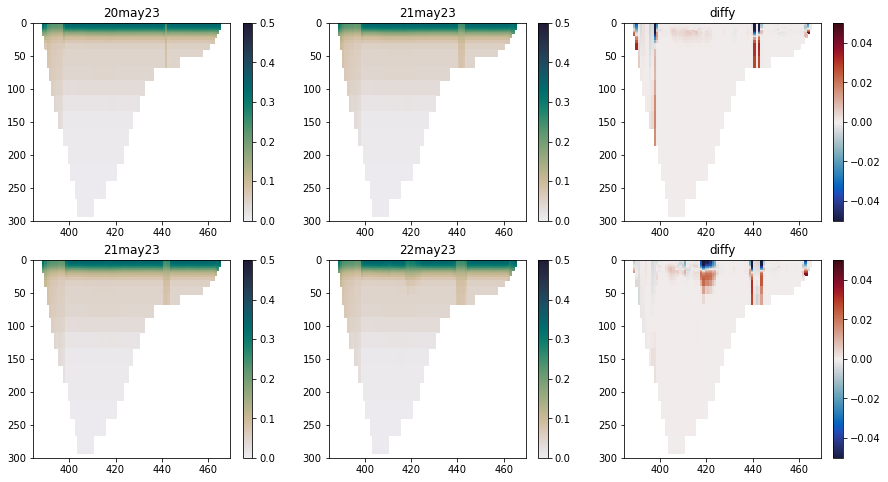

In [122]:
cross_plot('dissolved_organic_nitrogen', vmax=0.5, vmin=0, dv=0.05, cmap=cm.rain, file='ptrc')

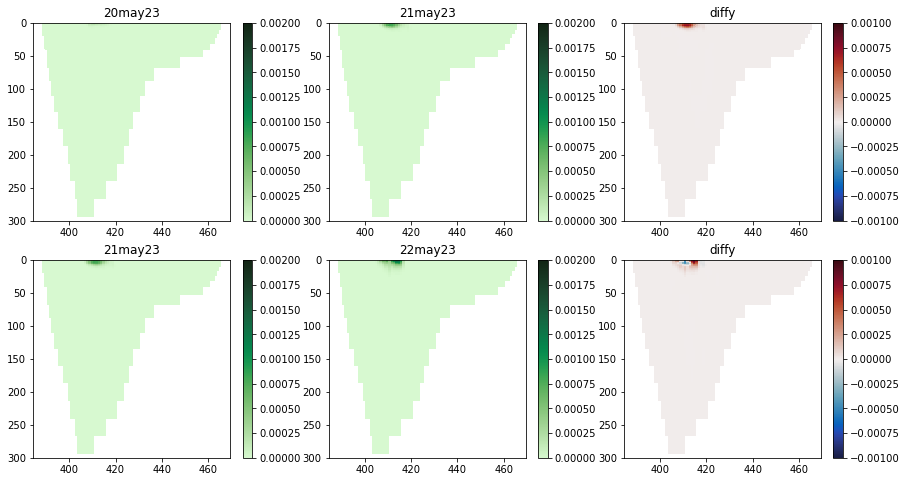

In [127]:
cross_plot('diatoms', vmax=0.002, vmin=0, dv=0.001, cmap=cm.algae, file='ptrc')

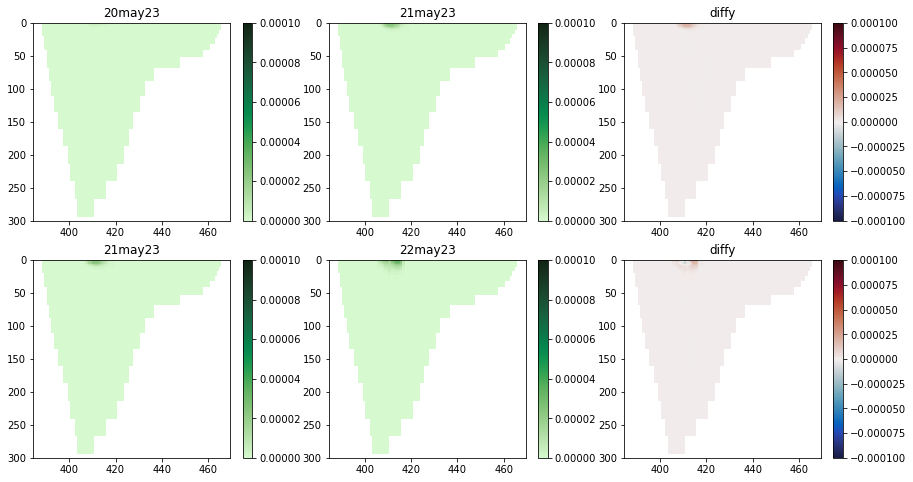

In [130]:
cross_plot('flagellates', vmax=0.0001, vmin=0, dv=0.0001, cmap=cm.algae, file='ptrc')

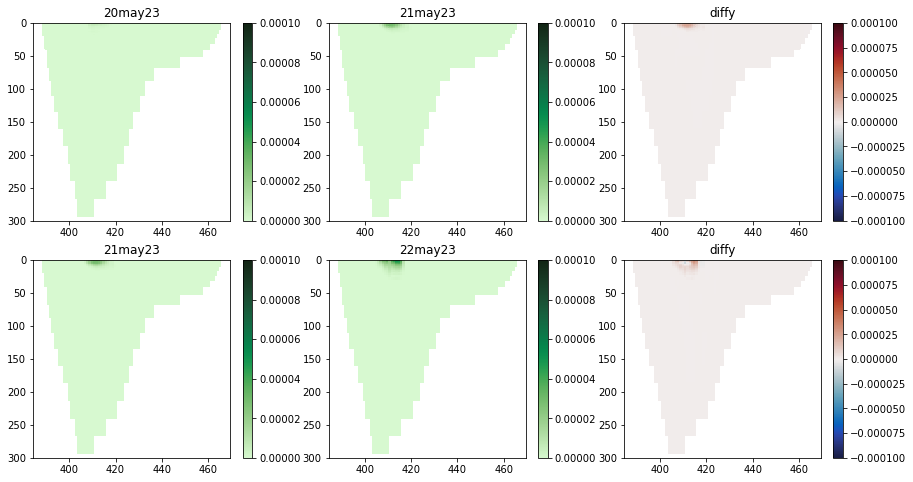

In [131]:
cross_plot('ciliates', vmax=0.0001, vmin=0, dv=0.0001, cmap=cm.algae, file='ptrc')

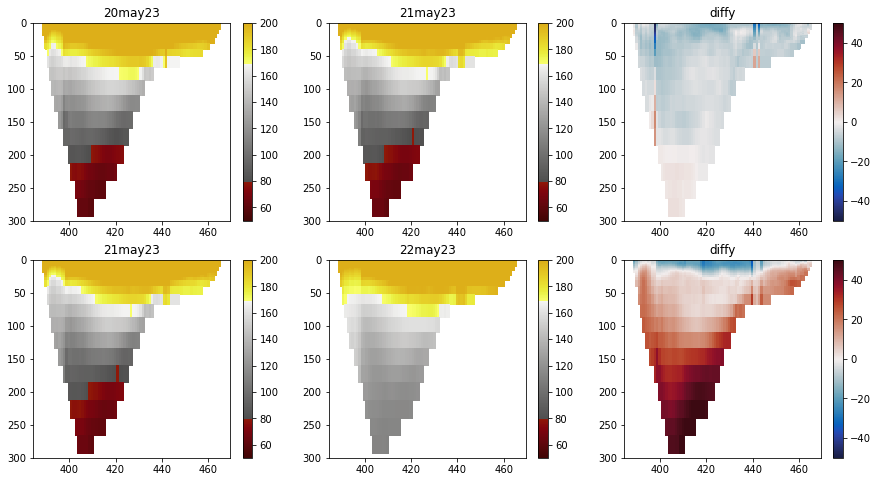

In [138]:
cross_plot('dissolved_oxygen', vmax=200, vmin=50, dv=50, cmap=cm.oxy, file='carp')

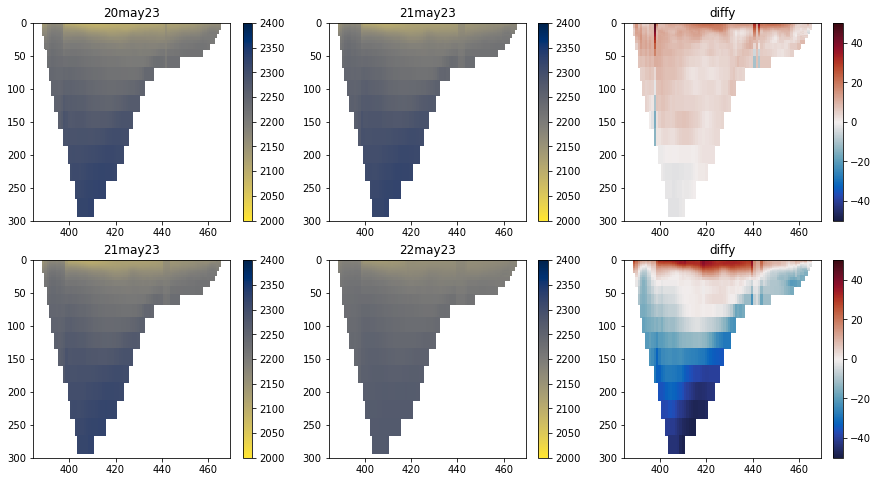

In [144]:
cross_plot('dissolved_inorganic_carbon', vmax=2400, vmin=2000, dv=50, cmap='cividis_r', file='carp')

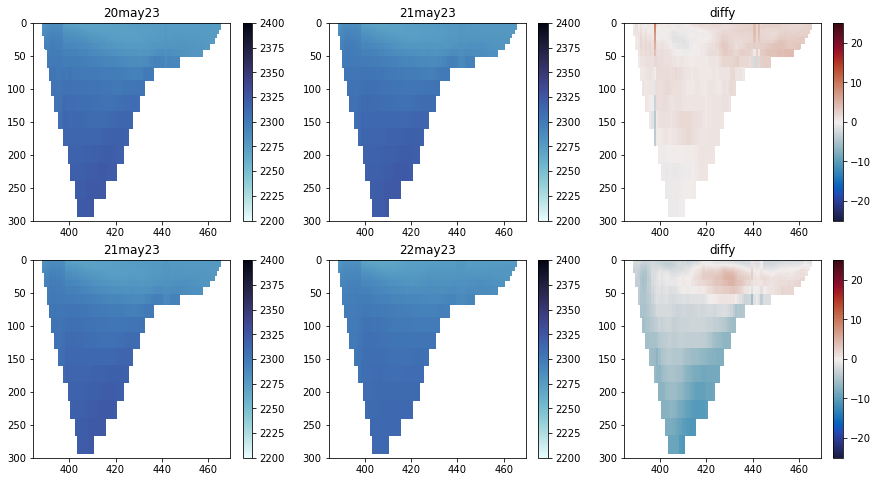

In [149]:
cross_plot('total_alkalinity', vmax=2400, vmin=2200, dv=25, cmap=cm.ice_r, file='carp')

## Summary ##
Deep water is significantly lower in nitrate and silicon, lower in DIC, higher in OXY and slightly lower in TA, temperature and slightly higher in salinity